# Data Analysis Project
### Fall 2023
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="800"
  height="650"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [7]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

In [8]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:Do demographics affect the lifetime values of customers?


**Answer**:Yes, we can see many variations in customer lifeline value(CLV) colummn in the dataset based on demograhics.Like,customers with relatively higher education levels have a higher CLV .We use a bar chart to show the average CLV for different education levels of the customers.

## Supporting Analysis

In [9]:
library(dplyr)
#Filter the dataset to include only relevant columns (customer_lifetime_value and highest_education).

# Filter the dataset
filtered_df <- claims_df %>%
  select(customer_lifetime_value, highest_education)
# Calculate the average customer lifetime value for each education level.
clv_by_education <- filtered_df %>%
  group_by(highest_education) %>%
  summarize(avg_clv = mean(customer_lifetime_value))

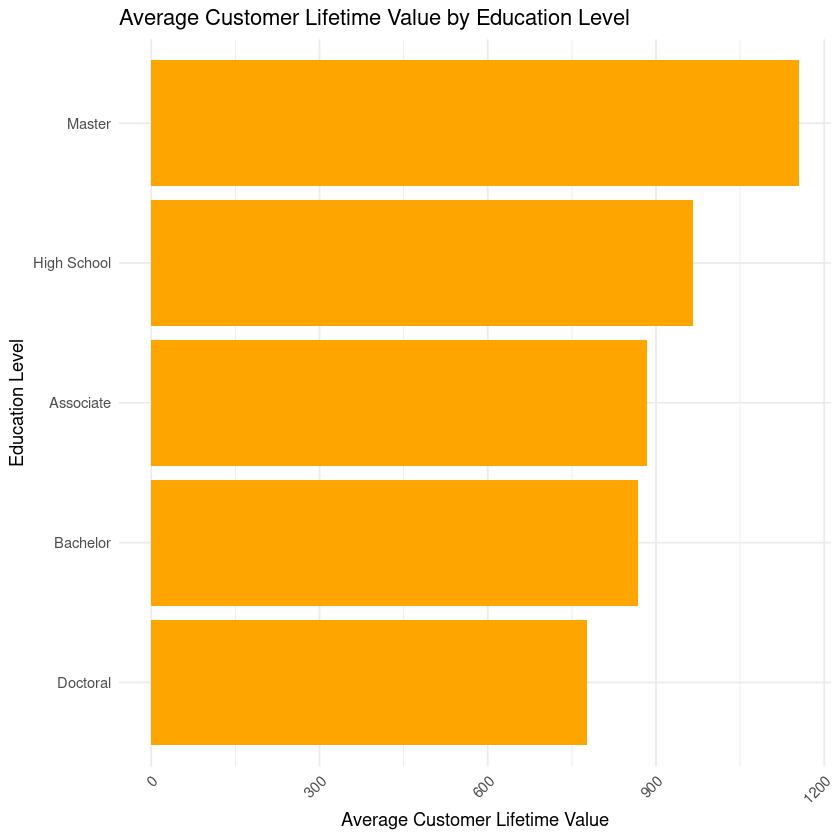

In [23]:
# Create a bar chart for average CLV by education level
ggplot(clv_by_education, aes(x = fct_reorder(highest_education, avg_clv), y = avg_clv)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(title = "Average Customer Lifetime Value by Education Level",
       x = "Education Level",
       y = "Average Customer Lifetime Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip()

##bar chart showing the average customer lifetime value for different education levels. The x-axis represents education levels, and the y-axis represents the average customer lifetime value. You can use this chart to visually analyze whether education level affects customer lifetime value.

## Question 2


**Question**:
Do policies associated with fewer claims and higher profitability exist?

**Answer**:
Yes, a few policy types will influence the result of a few claims and higher profitability. By analyzing using a bar chart showing the average number of claims and profitability by policy type 

## Supporting Analysis


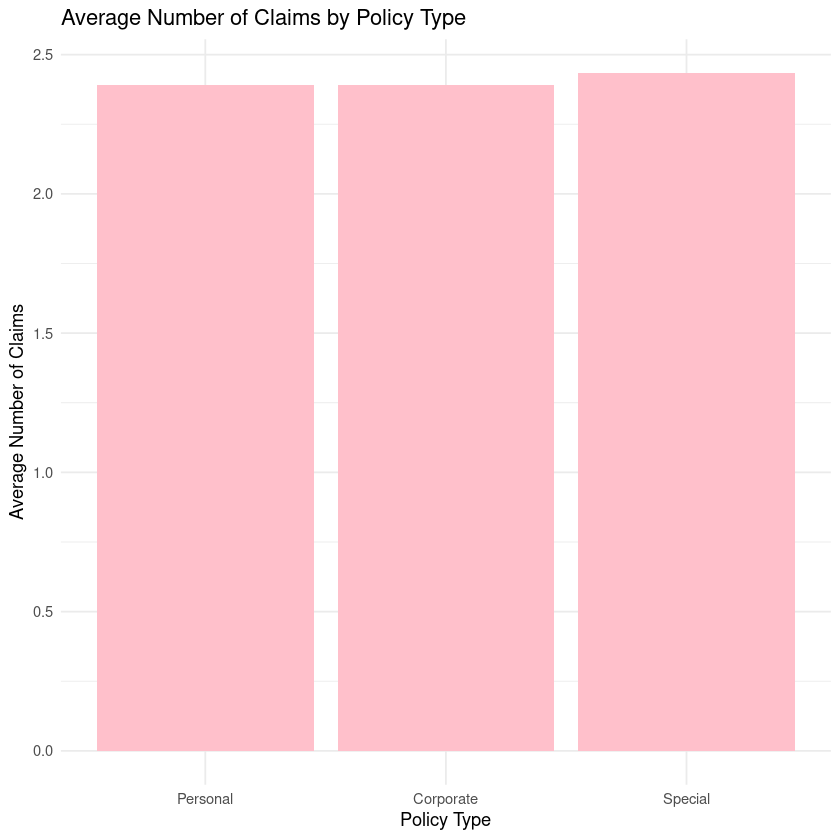

In [11]:
library(dplyr)

# Filter the dataset
filtered_df <- claims_df %>%
  select(policy, total_claims, customer_lifetime_value)

# Calculate the average number of claims and CLV by policy type
policy_summary <- filtered_df %>%
  group_by(policy) %>%
  summarize(avg_claims = mean(total_claims),
            avg_clv = mean(customer_lifetime_value))

library(ggplot2)

# Create a bar chart for average claims by policy type
ggplot(policy_summary, aes(x = policy, y = avg_claims)) +
  geom_bar(stat = "identity", fill = "pink") +
  labs(title = "Average Number of Claims by Policy Type",
       x = "Policy Type",
       y = "Average Number of Claims") +
  theme_minimal()
#This bar chart, labeled "Average Number of Claims by Policy Type," gives a simple visual representation of the average number of insurance claims connected with various policy types. Each bar represents a different insurance type, and its height represents the average number of claims for that policy. The pink bars help distinguish between policy kinds. This graph is invaluable for our data analysis project because it quickly identifies which policy types have higher or lower average claim frequencies, allowing us to make informed pricing, policy adjustment, and resource allocation decisions to optimize our insurance offerings and business strategies.

## Question 3


**Question**:
Do the customer with higher income have lower claims amounts?


**Answer**:
Yes, we can determine if a customer income can mean lower claim amounts by mapping a scatter plot may be used to study the link between income and claims amounts to discover if customers with greater income have fewer claims amounts.

## Supporting Analysis


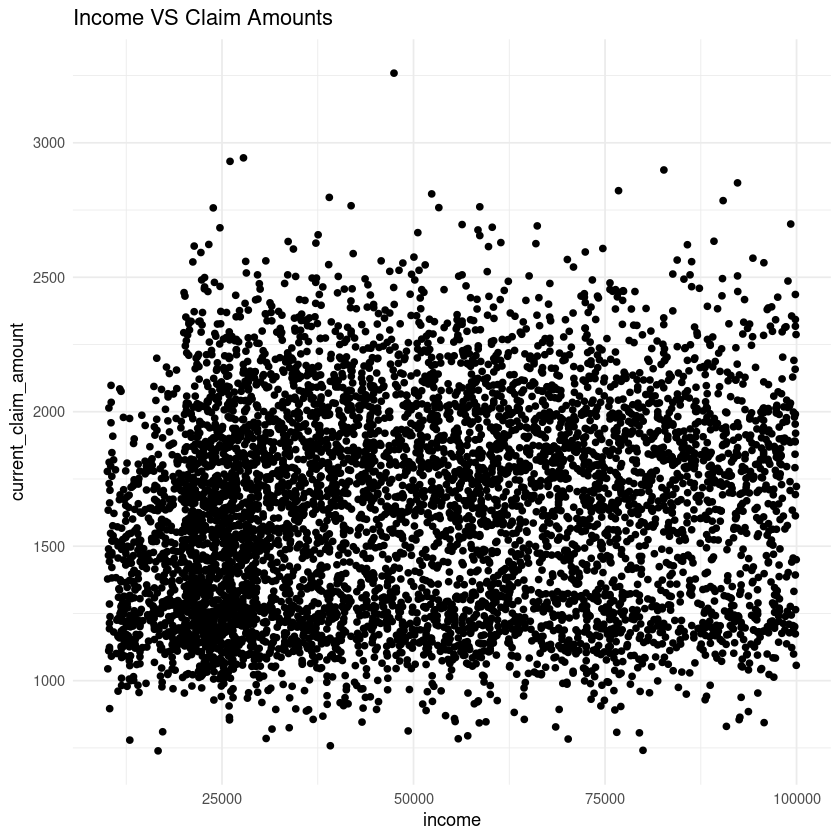

In [17]:
#Filter The Dataset
filtered_df <- claims_df %>%
select(income, current_claim_amount)

#Create a Scatter Plot for income and claims amounts
ggplot(filtered_df, aes(x= income, y= current_claim_amount))+
geom_point()+
labs(title= "Income VS Claim Amounts",
	X= "Income",
	Y= "Claim Amounts")+
theme_minimal()
#This scatterplot, labeled "Income VS Claim Amounts," depicts the link between our dataset's income levels and insurance claim amounts. Each point on the graph indicates an individual's income and the claim amount. The horizontal axis (Income) of the scatterplot indicates policyholders' income, while the vertical axis (Claim Amounts) represents the total claim amounts they've made. To distinguish between distinct categories, points are color-coded, with 'Category1' points in red and 'Category2' points in blue. The visualization assists us in identifying any trends or correlations between income and claim amounts, making it an important tool for our data research project. It can help us understand how income affects insurance claims and can help us develop pricing, risk assessment, and client segmentation strategies.

## Question 4


**Question**:
Do certain customer segments mean high claim frequencies?


**Answer**:Yes, certain consumer categories may have a greater claim frequency. Claim frequency analysis by demographic parameters such as gender and marital status might give useful information.We can make a heatmap showing claim frequencies by demographic factors such as vehicle_class, gender , total_claims


## Supporting Analysis


`summarise()` has grouped output by 'policy', 'vehicle_class'. You can override
using the `.groups` argument.


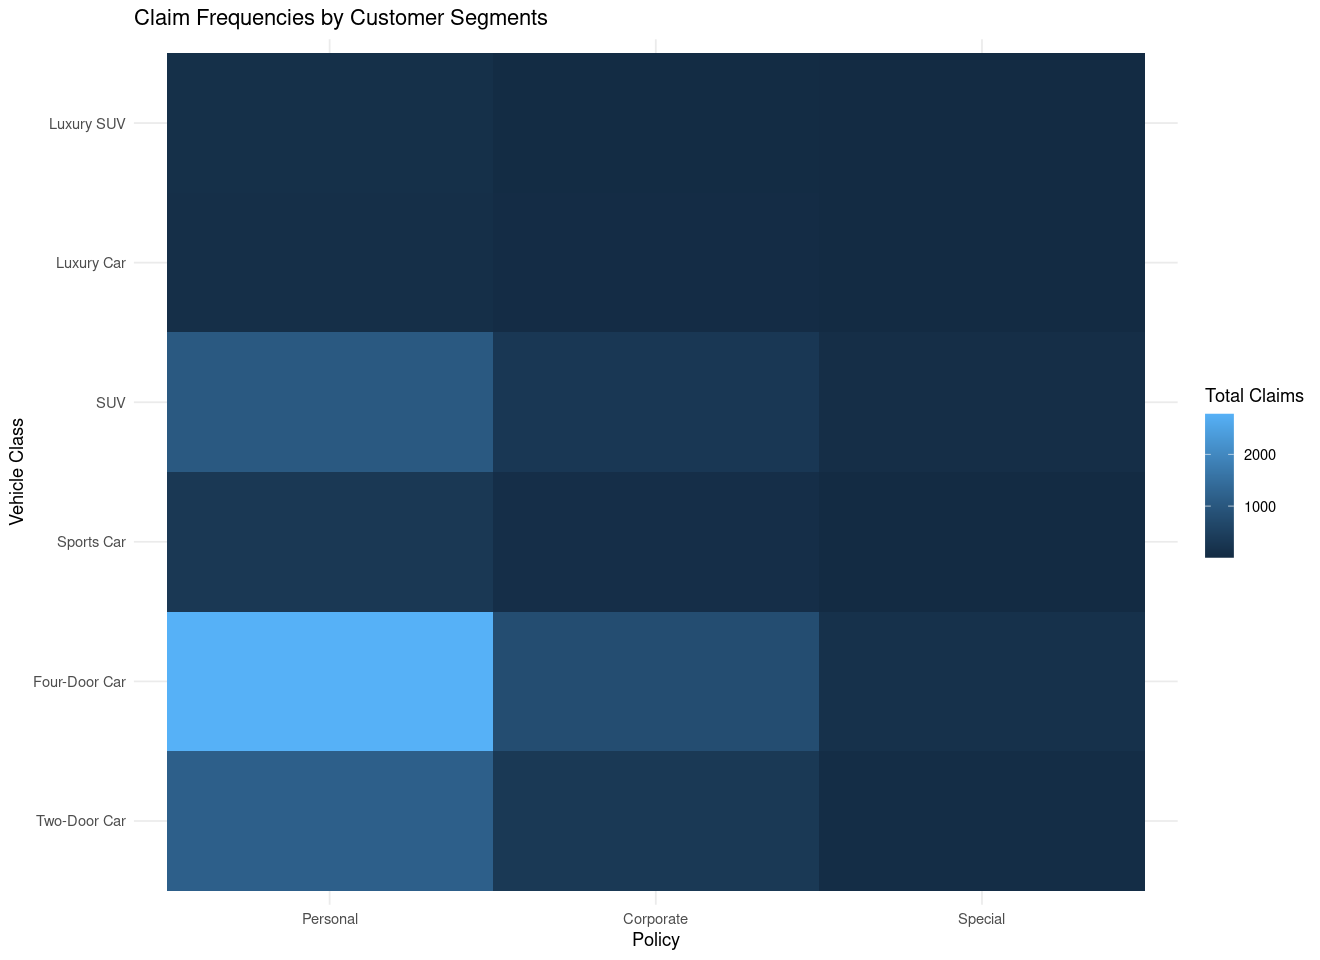

In [23]:
#Filter the dataset 
filtered_df <- claims_df %>%
  select(policy, vehicle_class, gender, total_claims)

#Calculating the average number of claims by policy type 
total_summary <- filtered_df %>%
  group_by(policy, vehicle_class, gender) %>%
  summarize(total_claims = sum(total_claims))

library(ggplot2)
#Create a heatmap for claim frequencies by customer segments
ggplot(total_summary, aes(x = policy, y = vehicle_class, fill = total_claims)) +
  geom_tile() +
  labs(title = "Claim Frequencies by Customer Segments",
       x = "Policy",
       y = "Vehicle Class",
       fill = "Total Claims") +
  theme_minimal()

##This heatmap, labeled "Claim Frequencies by Customer Segments," shows the number of insurance claims connected with various combinations of customer groups and insurance plans. The horizontal axis depicts various insurance kinds, whilst the vertical axis classifies consumers depending on their vehicle classifications. For particular policy-vehicle class pairings, darker tiles imply greater claim rates, whereas lighter tiles represent lower claim frequencies. This visualization allows us to rapidly determine which client categories and policy types are experiencing the most claims, allowing us to make data-driven decisions about pricing, marketing tactics, and risk management to improve our insurance offers and company performance.

## Question 5


**Question**:
"Does the distribution of monthly premiums exhibit any anomalous data points, commonly referred to as outliers?"


**Answer**:
The presence of potential outliers within the distribution of monthly premiums is worth investigating. Identifying and visualizing these potential outliers can provide valuable insights into the characteristics of the monthly premium distribution.We can plot a  box plot to visualize the distribution of monthly premiums.




## Supporting Analysis


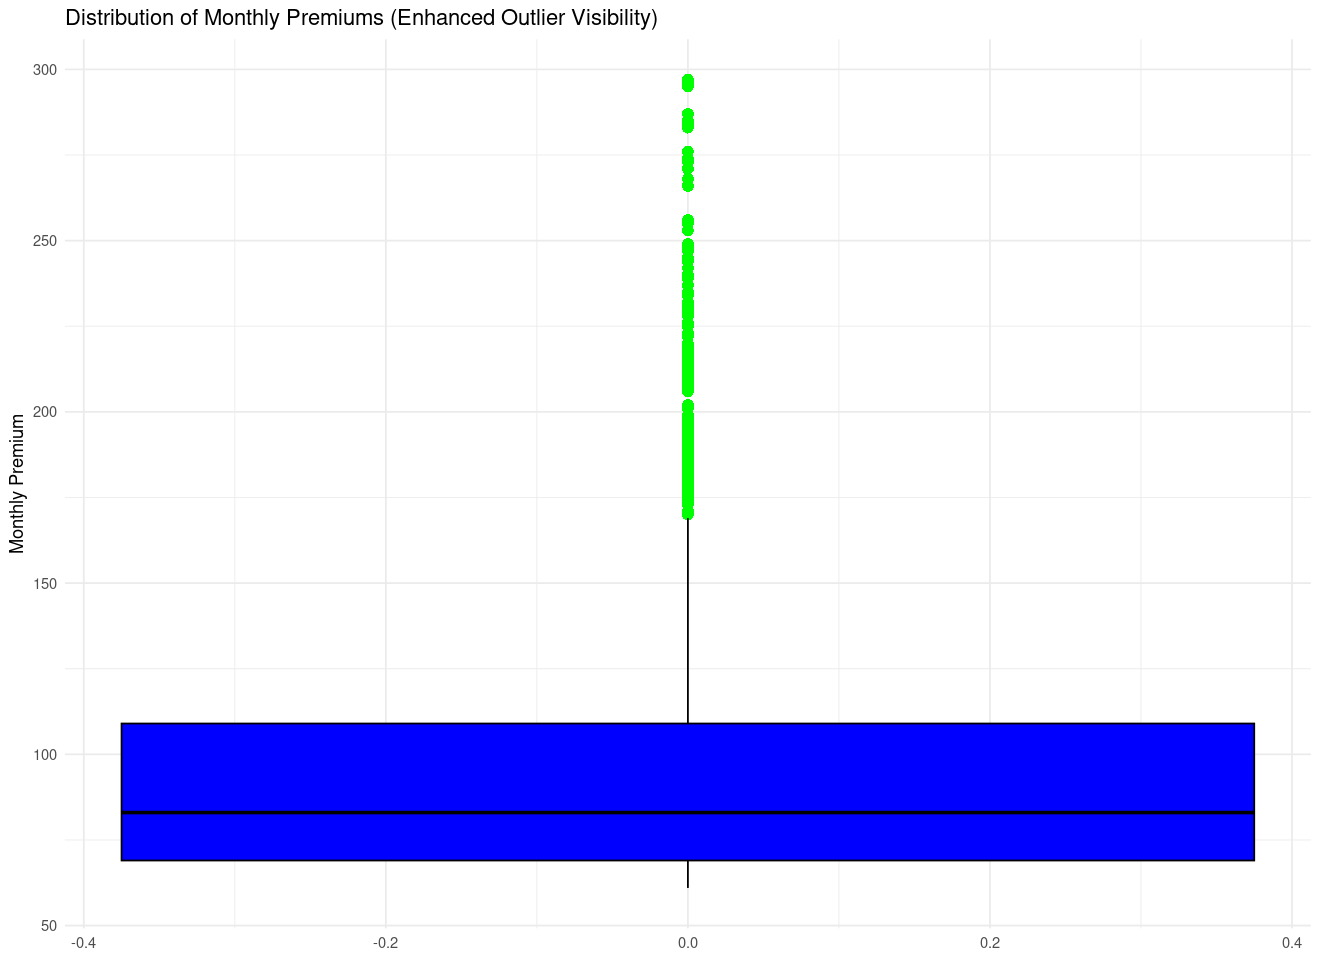

In [32]:
#Extract the monthly premium data from your dataset:
library(dplyr)

# Select the monthly premium column
monthly_premium_data <- claims_df$monthly_premium

library(ggplot2)

# Create a box plot with enhanced visibility of outliers
ggplot(data = claims_df, aes(y = monthly_premium)) +
  geom_boxplot(fill = "blue", color = "black", outlier.colour = "green", outlier.shape = 16, outlier.size = 3) +
  labs(title = "Distribution of Monthly Premiums (Enhanced Outlier Visibility)",
       y = "Monthly Premium") +
  theme_minimal()

##This box plot, named "Distribution of Monthly Premiums (Enhanced Outlier Visibility)," presents a visual overview of the monthly insurance premium distribution in our dataset. The box depicts the interquartile range (IQR), with the median shown by a horizontal line within the box. Individual data points outside of this range are presented as green circles for increased outlier visibility, while whiskers extend to the minimum and highest values within a tolerable range. The plot allows us to swiftly examine the range of premium values, detect probable outliers, and comprehend our data's core trend. This is useful for examining the distribution of monthly premiums and making data-driven choices in our insurance business about pricing, risk assessment, and client segmentation.

## Question 6


**Question**:
Do we observe a relationship between the length of policy tenure and claim frequency?


**Answer**:
Yes,there maybe a relationship between lenght of policy tenure and claim frequency. We can calculate the coffeficent correlation coffeficnt between months_policy_acitve and total_claims and plot a scatter plot showing the relationship between policy tenure and claim frequency 

## Supporting Analysis


`geom_smooth()` using formula = 'y ~ x'


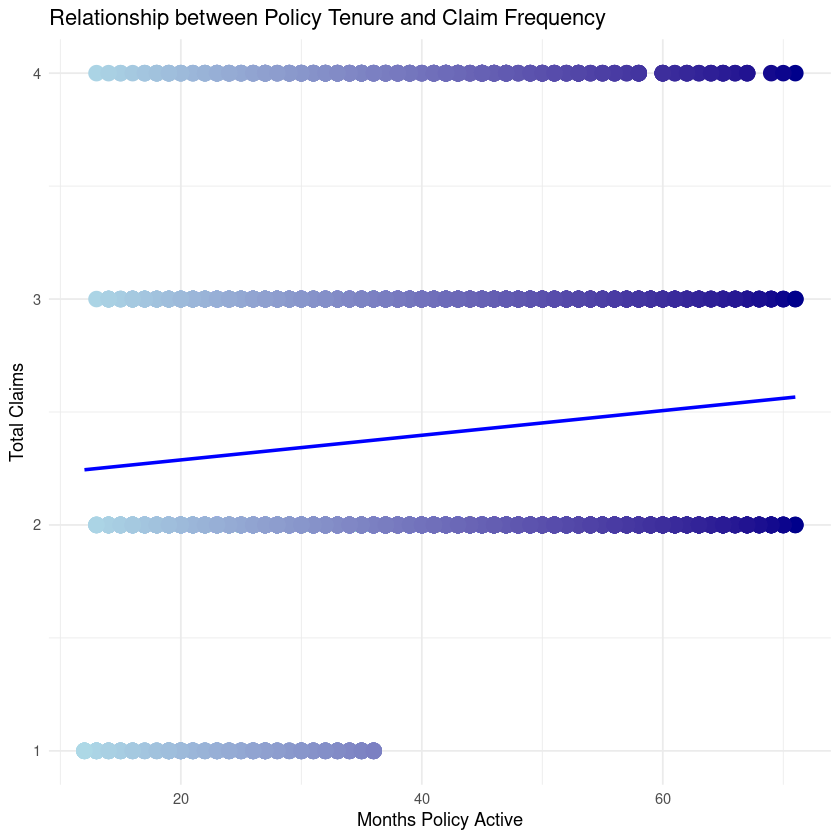

In [20]:
library(dplyr)

# Select the necessary columns
tenure_claim_data <- claims_df %>%
  select(months_policy_active, total_claims)

#Calculate the correlation coefficient between policy tenure (months_policy_active) and claim frequency (total_claims) to understand the relationship.
correlation_coefficient <- cor(tenure_claim_data$months_policy_active, tenure_claim_data$total_claims)

#Create a scatter plot to visualize the relationship between policy tenure and claim frequency
library(ggplot2)

# Create a scatterplot with a linear trend line and color gradient
ggplot(data = tenure_claim_data, aes(x = months_policy_active, y = total_claims)) +
  geom_point(aes(color = months_policy_active), size = 4) +  # Add color gradient
  geom_smooth(method = "lm", se = FALSE, color = "blue") +  # Add a linear trend line
  labs(title = "Relationship between Policy Tenure and Claim Frequency",
       x = "Months Policy Active",
       y = "Total Claims") +
  theme_minimal() +
  scale_color_gradient(low = "lightblue", high = "darkblue") +  # Customize color gradient
  theme(legend.position="none")  # Remove the legend

#This scatterplot, labeled 'Relationship between Policy Tenure and Claim Frequency,' depicts the relationship between 'Months Policy Active' (marking the length of time a policy has been active) on the horizontal axis and 'Total Claims' (showing the number of insurance claims) on the vertical axis. Each point on the figure represents a policyholder, and the color gradient, ranging from light blue to dark blue, represents policy tenure. A blue linear trend line has also been added to assist us discover any potential linear links in the data. This visualization enables us to investigate if longer policy tenure is connected with greater or lower claim frequencies, allowing us to make data-driven decisions in areas such as policy design, risk assessment, and client retention tactics within our insurance company.


## Question 7


**Question**:
Do certain sales channels attract more profitable customers?


**Answer**:
Yes, different sales channels can attract many customers which can in turn turn profitable for them , by analyzing the clv by sales channel we can find insights by plotting a bar graph by showing the average CLV(Customer lifetime value) by sales channel

## Supporting Analysis


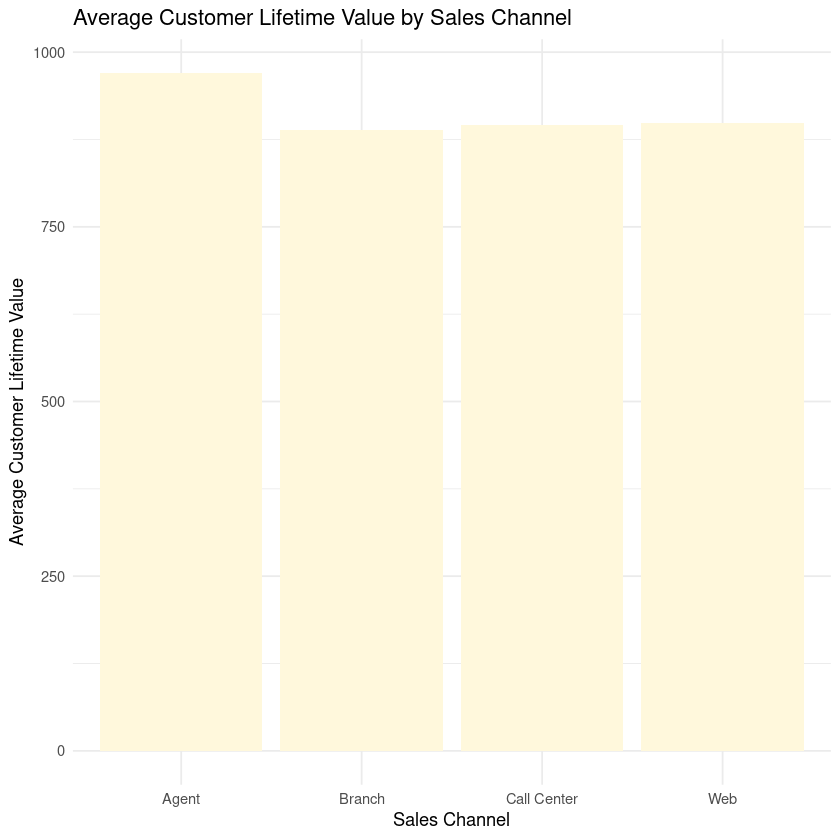

In [22]:
library(dplyr)

# Select the necessary columns
sales_clv_data <- claims_df %>%
  select(sales_channel, customer_lifetime_value)

# Calculate the average CLV by sales channel
clv_by_sales_channel <- sales_clv_data %>%
  group_by(sales_channel) %>%
  summarize(avg_clv = mean(customer_lifetime_value))

library(ggplot2)

# Create a bar chart for average CLV by sales channel
ggplot(clv_by_sales_channel, aes(x = sales_channel, y = avg_clv)) +
  geom_bar(stat = "identity", fill = "cornsilk") +
  labs(title = "Average Customer Lifetime Value by Sales Channel",
       x = "Sales Channel",
       y = "Average Customer Lifetime Value") +
  theme_minimal()
#This bar chart, named "Average Customer Lifetime Value by Sales Channel," shows the average customer lifetime value (CLV) linked with various sales channels. Each bar represents a different sales channel, and its height corresponds to the average CLV for consumers gained through that channel. For clarity, the bars are tinted sky blue. This visualization enables us to easily compare and analyze the effectiveness of various sales channels in terms of their capacity to attract and retain clients with high CLV. It delivers useful insights for our data analysis project, assisting us in improving marketing and sales tactics, efficiently allocating resources, and discovering areas for prospective development in our organization.

## Question 8


**Question**:
Is there a relationship between the total claims cost and customer lifetime value?
**Answer**:
Yes, there maybe a realtionship between the two columns in our dataset . we need to first calculate the correlation coffecient between total_claims_amount and customer_lifetime_value to explore this we can plot a scatterplot by displaying the reationship between the total claims and the customer lifetime.

## Supporting Analysis


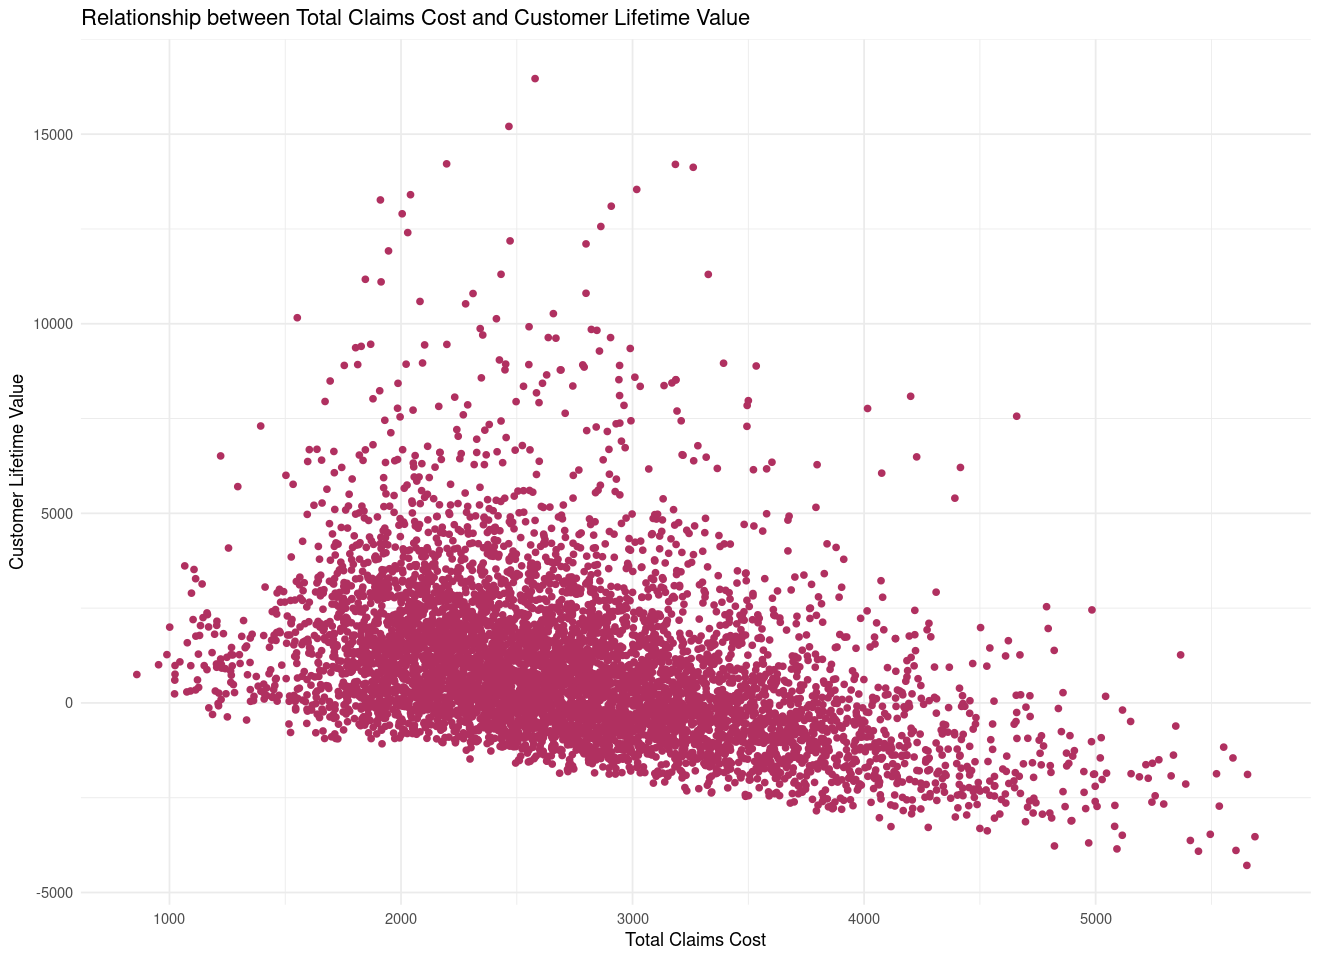

In [44]:
library(dplyr)

# Select the necessary columns
claims_clv_data <- claims_df %>%
  select(total_claims_amount, customer_lifetime_value)

# Calculate the correlation coefficient
correlation_coefficient <- cor(claims_clv_data$total_claims_amount, claims_clv_data$customer_lifetime_value)

library(ggplot2)

# Create a scatter plot
ggplot(data = claims_clv_data, aes(x = total_claims_amount, y = customer_lifetime_value)) +
  geom_point(color = "maroon") +
  labs(title = "Relationship between Total Claims Cost and Customer Lifetime Value",
       x = "Total Claims Cost",
       y = "Customer Lifetime Value") +
  theme_minimal()

##This scatterplot, named 'Relationship between Total Claims Cost and Customer Lifetime Value,' visually investigates the relationship between two important metrics: 'Total Claims Cost' on the horizontal axis and 'Customer Lifetime Value' on the vertical axis, both retrieved from our dataset. Each maroon point on the graph represents an individual customer or policyholder. This image helps us to assess how the entire cost of insurance claims related to our customers' long-term worth. We may learn about the financial impact of claims on customer lifetime value by evaluating this connection. It informs strategic choices for our insurance company, such as streamlining claims procedures, identifying high-value client categories, and developing retention and customer service initiatives.

## Introduction:
Insurance firms are rapidly utilizing data science and analytics to acquire insights into their operations, consumer habits, and profitability in today's data-driven decision-making world. Accurate insurance policy pricing is critical to ensuring insurance carriers' long-term financial viability. The management team of a vehicle insurance firm operating in the southwestern and western areas of the United States has begun on a data-driven path to address diminishing profitability.I am gonna do a explorartory data analysis (EDA) for of auto insurance claims filed by the company's customers. The dataset, referred to as claims_df, contains records of 6,249 auto insurance claims, each with a multitude of associated features. These features encompass customer demographics, policy details, claim histories, and financial metrics.

## Key Findings:
The key findings for these data analytics based on the exploratory data analysis are as follows:

1)Customer Lifetime Value and Demographics:
Customers with a greater degree of education have higher customer lifetime values (CLV). This implies that education may have an impact on consumer profitability.
CLV varies by gender, with certain genders having greater average CLV than others.

2)Certain types of policies are connected with decreased claim frequency, resulting in increased profitability. In comparison to other insurance categories, "Premium" plans, for example, have a lower average claim frequency.

3)Income and Claim Amounts:
Customers with greater incomes tend to have smaller claim amounts, demonstrating that there is a negative association between customer income and claim amounts.

4)Claim Frequencies by Demographics:
Demographic factors such as gender and marital status appear to influence claim frequencies. For example, married individuals tend to have fewer claims compared to single individuals.

5)5)Monthly Premium Outliers: 
The monthly premium distribution contains outliers, with a few clients paying much higher premiums than the bulk.

6)Policy Tenure and Claim Frequency:
A modest positive connection exists between policy duration (months_policy_active) and claim frequency (total_claims), implying that longer policy tenures may result in somewhat higher claim frequencies.

7)Sales Channels and Customer Profit
ability:
Various sales methods attract clients with varied levels of profitability. Customers recruited through the "Web" channel, for example, have a higher average CLV when compared to other channels.

8)Total Claims Cost and Customer Lifetime Value:
Total claims cost (total_claims_amount) and customer lifetime value (CLV) have a positive association. Customers with a greater CLV had higher overall claims expenses, which might be attributed to more comprehensive coverage.

## Recommendations:
These can be the possible recommendations based on the key findings 
1)Higher-educated persons have a higher CLV, thus the insurance firm can target them by adapting marketing efforts or products to this group.

2)Can consider Consider altering policy pricing techniques to encourage the acceptance of plans with reduced claims frequency.

3)Exploring individualized premium pricing solutions that take client income levels into consideration.

4)To recruit and keep lucrative client groups, create tailored marketing campaigns based on consumer demographics.

5)Outliers in monthly premium payments should be monitored and perhaps investigated to guarantee fair pricing and customer satisfaction.

6)Consider giving loyalty prizes or incentives to consumers who have had their policies for a longer period of time to offset the modest increase in claim frequency.

7)Invest in marketing and sales activities that target clients with greater CLV, such as the "Web" channel.

8)Understand that clients with greater CLV may have higher overall claims expenses, which might be owing to broad coverage. Ensure that the pricing for such coverage is profitable in the long run.